In [1]:
library(tidyverse)
library(ape)
library(microbiome)
library(ggthemes)     # additional themes fro ggplot2
library(ggpubr)
library(vegan)
library(repr)
library(ggpmisc)      # to use stat_poly_eq
library(RColorBrewer) # nice color options
library(gridExtra)    # gridding plots
library(viridis)
library(ggrepel)
#library(wesanderson) #new palettes http://www.sthda.com/english/wiki/ggplot2-colors-how-to-change-colors-automatically-and-manually
library(rioja)        # plotting poackages for tabular bubbleplots
library(reshape2) 
library(dada2)
library(DECIPHER)
#library(ggtern)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where


Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform



Attaching package: ‘ggpubr’




In [2]:
options(repr.plot.width=12, repr.plot.height=8)
set.seed(10000)

theme_glab <- function(base_size = 20,
                    base_family = "",
                    base_line_size = base_size / 180,
                    base_rect_size = base_size / 180) {
   
    font <- "Helvetica" #assign font family up front
   
    theme_bw(base_size = base_size,
                base_family = base_family,
                base_line_size = base_line_size) %+replace%
    theme(
        legend.background =  element_blank(),
        legend.title =       element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65),
                                         hjust = 0),
        legend.text =        element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65)),
        legend.key.size =    unit(0.8, "lines"),
     
      plot.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        hjust = 0),
       
      axis.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
      axis.text = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
       
      plot.caption = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.7),
        hjust = 1),
       
      panel.grid.major = element_blank(),  
      panel.grid.minor = element_blank(),  
      panel.border = element_rect(fill = NA, colour = rgb(100, 100, 100, maxColorValue = 255)),

     
      complete = TRUE
    )
}


In [3]:
CAs_otu_raw <- read.csv("dataset_CoEvolve/Coevolve_distribution_GAMMAPROK.csv", sep="\t", header=TRUE)

CAs_otu_raw

Expedition,hmm,CA_class,Total.coverage,Normalized_total_coverage,Sample
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
arg19,Gamma_CA_prok,Gamma,201.8045,7.006766,AG11
arg19,Gamma_CA_arch,Gamma,2108.4637,73.207045,AG11
arg19,Gamma_CA_prok,Gamma,482.2345,22.558299,AG13
arg19,Gamma_CA_arch,Gamma,3025.8081,141.543341,AG13
arg19,Gamma_CA_prok,Gamma,903.1302,104.795629,AG15
arg19,Gamma_CA_arch,Gamma,4822.4956,559.583171,AG15
arg19,Gamma_CA_prok,Gamma,21.6428,2.320270,AG17
arg19,Gamma_CA_arch,Gamma,314.1991,33.684488,AG17
arg19,Gamma_CA_prok,Gamma,103.3064,2.597541,AG19


## OTU_table

In [4]:
subset1 <- as.data.frame(CAs_otu_raw[, c("hmm", "Normalized_total_coverage", "Sample")])
subset2 <- subset1[!duplicated(subset1),]
otu_table <- as.data.frame(subset2 %>% pivot_wider(names_from = Sample, 
                                                   values_from = Normalized_total_coverage, 
                                                   values_fill = list(Value = 0)))
row.names(otu_table) <- otu_table$hmm
otu_table$hmm <- NULL


otu_table


,AG11,AG13,AG15,AG17,AG19,AG1,AG22,AG24,AG3,AG5,⋯,GN-1-F,GN-2-F,HV-1-F,HV-1-S,HV-2-F,HV-2-S,KR-1-F,KR-1-S,KR-2-F,KR-2-S
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Gamma_CA_prok,7.006766,22.5583,104.7956,2.32027,2.597541,4.193443,18.89368,3.774933,13.73333,8.521976,⋯,34.31993,88.55266,555.537,150.5917,4.281777,9.930535,34.34497,98.6866,121.7335,72.40057
Gamma_CA_arch,73.207045,141.5433,559.5832,33.68449,37.144254,33.004217,127.93484,36.772182,72.57414,105.513857,⋯,136.90025,284.92114,2201.927,504.6610,10.434475,32.941628,75.81817,231.1800,286.5104,196.09878


In [5]:
otu_table_final <- as.data.frame(otu_table)
otu_table_final[is.na(otu_table_final)] <- 0

otu_table_final

,AG11,AG13,AG15,AG17,AG19,AG1,AG22,AG24,AG3,AG5,⋯,GN-1-F,GN-2-F,HV-1-F,HV-1-S,HV-2-F,HV-2-S,KR-1-F,KR-1-S,KR-2-F,KR-2-S
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Gamma_CA_prok,7.006766,22.5583,104.7956,2.32027,2.597541,4.193443,18.89368,3.774933,13.73333,8.521976,⋯,34.31993,88.55266,555.537,150.5917,4.281777,9.930535,34.34497,98.6866,121.7335,72.40057
Gamma_CA_arch,73.207045,141.5433,559.5832,33.68449,37.144254,33.004217,127.93484,36.772182,72.57414,105.513857,⋯,136.90025,284.92114,2201.927,504.6610,10.434475,32.941628,75.81817,231.1800,286.5104,196.09878


## Taxa_table 
(hmm our case)

In [6]:
tax_table_raw  <- as.data.frame(CAs_otu_raw[, c("hmm", "CA_class")])
tax_table <- tax_table_raw[!duplicated(tax_table_raw), ]
row.names(tax_table) <- tax_table$hmm

tax_table

tax_table <- as.matrix(tax_table)

,hmm,CA_class
,<chr>,<chr>
Gamma_CA_prok,Gamma_CA_prok,Gamma
Gamma_CA_arch,Gamma_CA_arch,Gamma


## Sample_data

In [7]:
sample_data <- read.csv("dataset_CoEvolve/Coevolve_env_data.csv", row.names=1)
sample_data_final <-as.data.frame(sample_data)
sample_data_final

,ID,expedition,nation,site_name,latitude,longitude,type,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG1,AG1,ARG19,Argentina,Incachule,-24.282129,-66.46676,S,46.90,6.52,NA,10.0,1.54,NA,3000.0
AG11,AG11,ARG19,Argentina,Pastos Grandes,-24.364589,-66.57113,S,44.90,8.74,-15.33,50.0,0.61,15.400,1288.0
AG13,AG13,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.858188,-66.99269,S,80.00,7.75,-14.81,10.0,0.19,NA,429.0
AG15,AG15,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.858243,-66.99282,S,80.00,3.21,-12.40,60.0,1.02,21.120,2050.0
AG17,AG17,ARG19,Argentina,Galán La Colcha,-26.032911,-66.98609,BG,84.00,6.94,-2.62,20.0,6.10,300.080,10618.0
AG19,AG19,ARG19,Argentina,Botijuela,-25.743034,-67.82325,S,40.00,6.44,NA,10.0,8.65,700.480,14643.0
AG22,AG22,ARG19,Argentina,Rosario de la Frontera,-25.409860,-64.59134,S,82.00,8.23,-8.28,0.0,1.57,151.800,3056.0
AG24,AG24,ARG19,Argentina,El Galpón,-24.409860,-64.59146,S,54.30,8.47,-10.67,0.0,1.81,94.662,3474.0
AG3,AG3,ARG19,Argentina,Pompeya,-24.246688,-66.36272,S,50.30,6.53,-5.33,10.0,5.09,930.309,9000.0


## PHYLOSEQ

In [8]:
CAs <- phyloseq(
    otu_table(otu_table_final, taxa_are_rows = T),
    tax_table(tax_table),
    sample_data(sample_data_final)
)

CAs

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2 taxa and 139 samples ]
sample_data() Sample Data:       [ 139 samples by 14 sample variables ]
tax_table()   Taxonomy Table:    [ 2 taxa by 2 taxonomic ranks ]

## Alpha-diversity

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


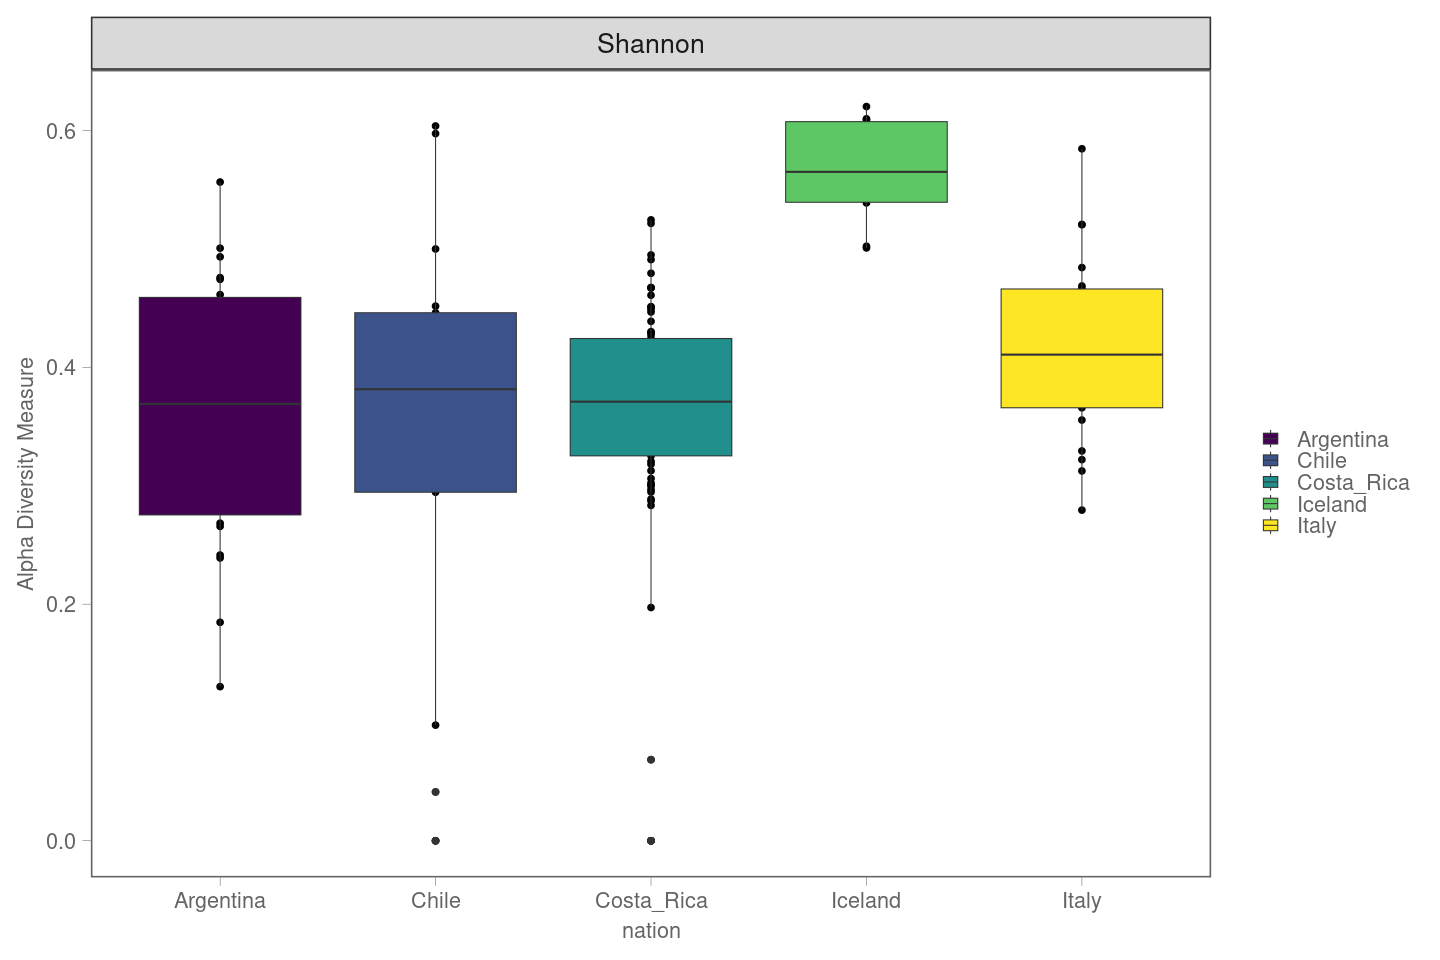

In [9]:
p.alph_div <- plot_richness(CAs, measures=c("shannon"), x="nation") + 

geom_boxplot(aes(fill=nation), lwd=0.3) +  

scale_fill_viridis(discrete=T) +

#scale_fill_manual(values = c("#B2182B", "#D6604D", "#F4A582", "#FDDBC7", "#D1E5F0"),
                  #labels=c("x","y","z")) +

#scale_x_discrete(name="",labels=c("x","y","z")) +

theme_glab() + theme(legend.title = element_blank())

p.alph_div

In [10]:
data.frame(sample_data(CAs))

,ID,expedition,nation,site_name,latitude,longitude,type,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG11,AG11,ARG19,Argentina,Pastos Grandes,-24.36459,-66.57113,S,44.90,8.74,-15.33,50.0,0.61,15.400,1288
AG13,AG13,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.85819,-66.99269,S,80.00,7.75,-14.81,10.0,0.19,NA,429
AG15,AG15,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.85824,-66.99282,S,80.00,3.21,-12.40,60.0,1.02,21.120,2050
AG17,AG17,ARG19,Argentina,Galán La Colcha,-26.03291,-66.98609,BG,84.00,6.94,-2.62,20.0,6.10,300.080,10618
AG19,AG19,ARG19,Argentina,Botijuela,-25.74303,-67.82325,S,40.00,6.44,NA,10.0,8.65,700.480,14643
AG1,AG1,ARG19,Argentina,Incachule,-24.28213,-66.46676,S,46.90,6.52,NA,10.0,1.54,NA,3000
AG22,AG22,ARG19,Argentina,Rosario de la Frontera,-25.40986,-64.59134,S,82.00,8.23,-8.28,0.0,1.57,151.800,3056
AG24,AG24,ARG19,Argentina,El Galpón,-24.40986,-64.59146,S,54.30,8.47,-10.67,0.0,1.81,94.662,3474
AG3,AG3,ARG19,Argentina,Pompeya,-24.24669,-66.36272,S,50.30,6.53,-5.33,10.0,5.09,930.309,9000


In [11]:
CAs_alpha <- data.frame(
                        estimate_richness(CAs, measures = c("Shannon")),
                        data.frame(sample_data(CAs)$temperature),
                        data.frame(sample_data(CAs)$pH),
                        data.frame(sample_data(CAs)$salinity),
                        data.frame(sample_data(CAs)$nation)
)
CAs_alpha

Warning message in estimate_richness(CAs, measures = c("Shannon")):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


,Shannon,sample_data.CAs..temperature,sample_data.CAs..pH,sample_data.CAs..salinity,sample_data.CAs..nation
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AG11,0.2963660,44.90,8.74,0.61,Argentina
AG13,0.4003356,80.00,7.75,0.19,Argentina
AG15,0.4358944,80.00,3.21,1.02,Argentina
AG17,0.2390226,84.00,6.94,6.10,Argentina
AG19,0.2414690,40.00,6.44,8.65,Argentina
AG1,0.3521936,46.90,6.52,1.54,Argentina
AG22,0.3838669,82.00,8.23,1.57,Argentina
AG24,0.3096518,54.30,8.47,1.81,Argentina
AG3,0.4382094,50.30,6.53,5.09,Argentina


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..rr.label..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(rr.label)` instead.”
Warning message:
“Removed 10 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


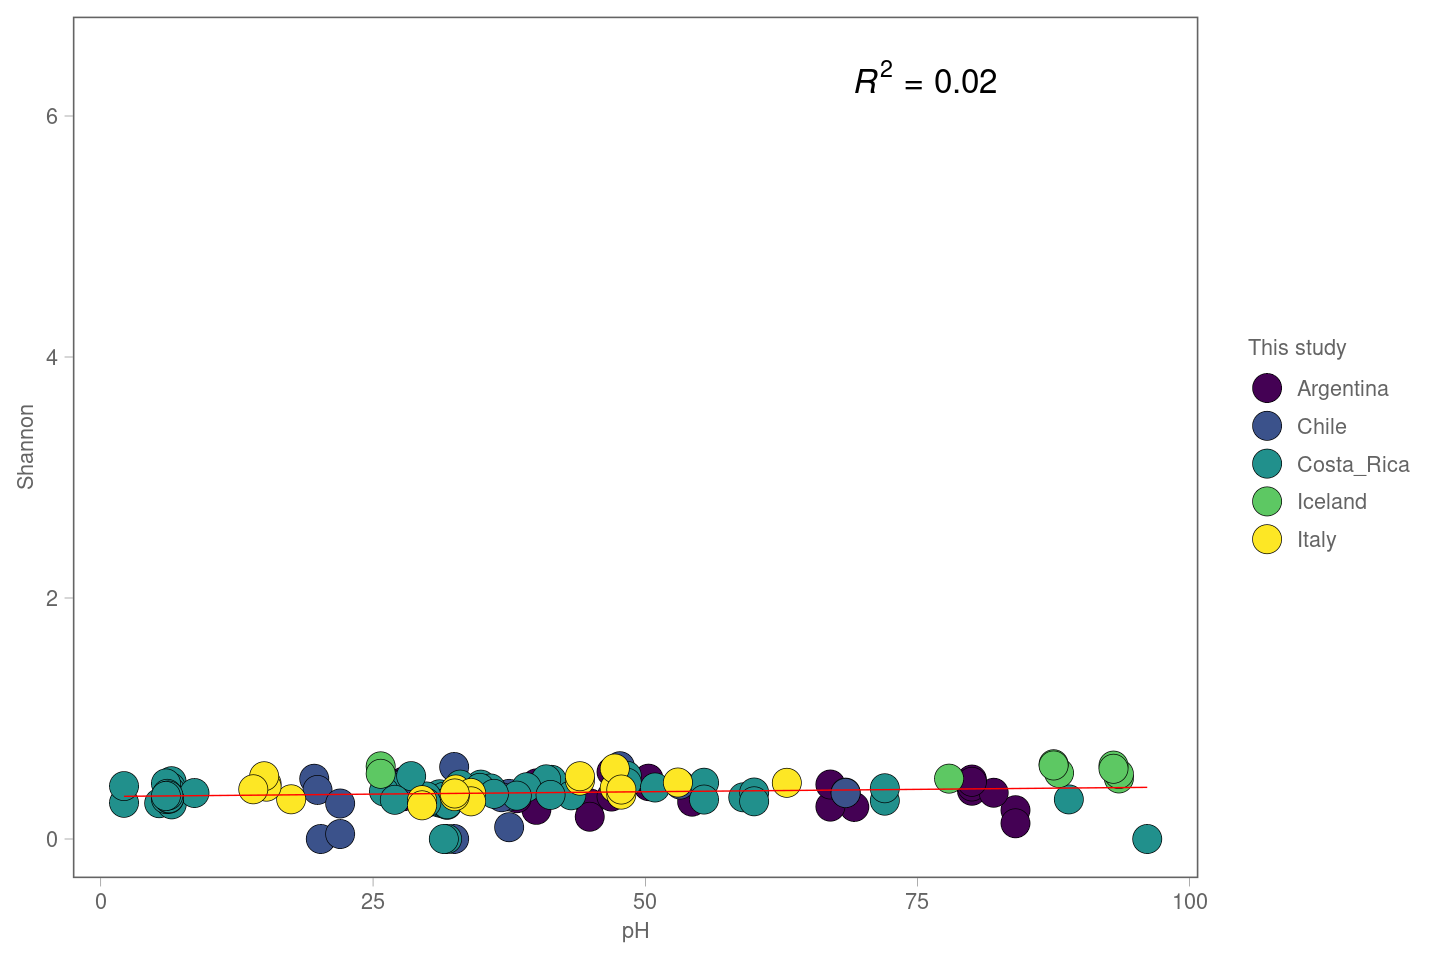

In [12]:
p.shan_temp <-ggplot(CAs_alpha,aes(x=sample_data.CAs..temperature,y=Shannon)) + 
geom_point(size=8,aes(fill=sample_data.CAs..nation),stroke=.3, shape=21)  +
scale_fill_viridis(discrete=TRUE) +
# scale_fill_manual(values=c("#440154","#3b528b","#2a788e","#fde725")) +
# geom_text(aes(label= sample_data.prok_ndata..code), size=5, hjust=-0.1, vjust=2.2) +
stat_poly_eq(formula = y ~ x, aes(label = paste(..rr.label.., sep = "~~")), parse = TRUE,hjust=-5,size=7) +
             geom_smooth(method=lm, formula= y~x,  se=FALSE,color="red",size=.4) +
xlab("pH") + 
guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
labs(fill="This study", shape="Sample type") + 
ylim(NA,6.5) +
theme_glab()

p.shan_temp

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


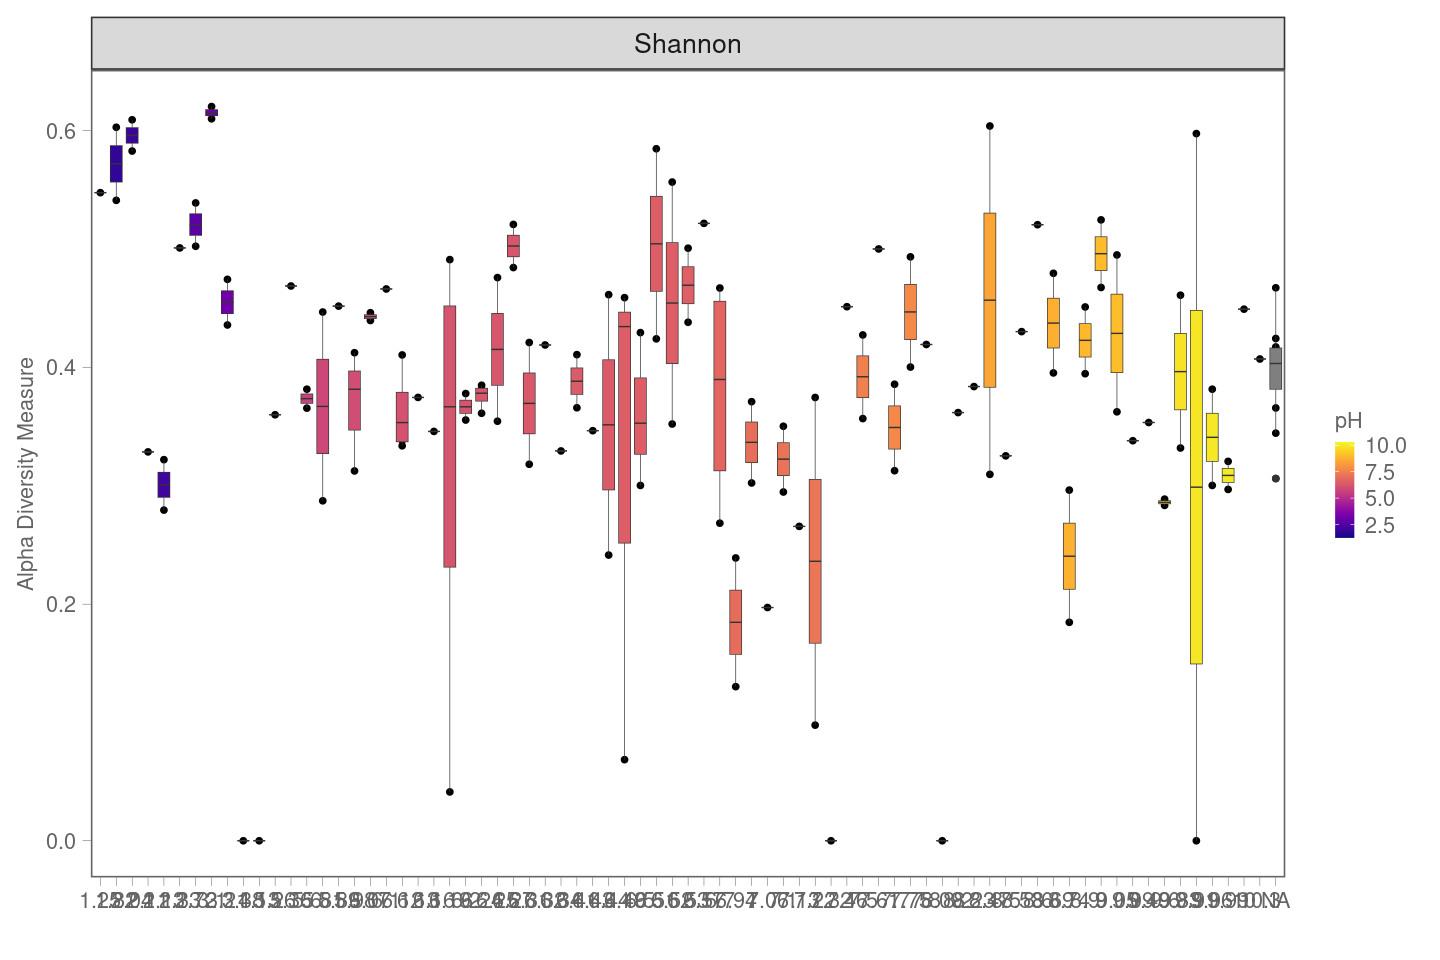

In [13]:
plot_richness(CAs, measures=c("shannon"), x="as.factor(pH)") + 
geom_boxplot(aes(fill=pH),lwd=0.2) +  

scale_fill_viridis(discrete=F,option="plasma") + 


labs(x="") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
                     axis.text=element_text(size=12,face="bold")) + theme_glab()

In [14]:
CAs_norm = transform_sample_counts(CAs, function(x){x / sum(x)})
CAs_norm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2 taxa and 139 samples ]
sample_data() Sample Data:       [ 139 samples by 14 sample variables ]
tax_table()   Taxonomy Table:    [ 2 taxa by 2 taxonomic ranks ]

## Barplots

In [15]:
CAs_hmm = tax_glom(CAs_norm, "hmm", NArm = FALSE)
CAs_hmm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2 taxa and 139 samples ]
sample_data() Sample Data:       [ 139 samples by 14 sample variables ]
tax_table()   Taxonomy Table:    [ 2 taxa by 2 taxonomic ranks ]

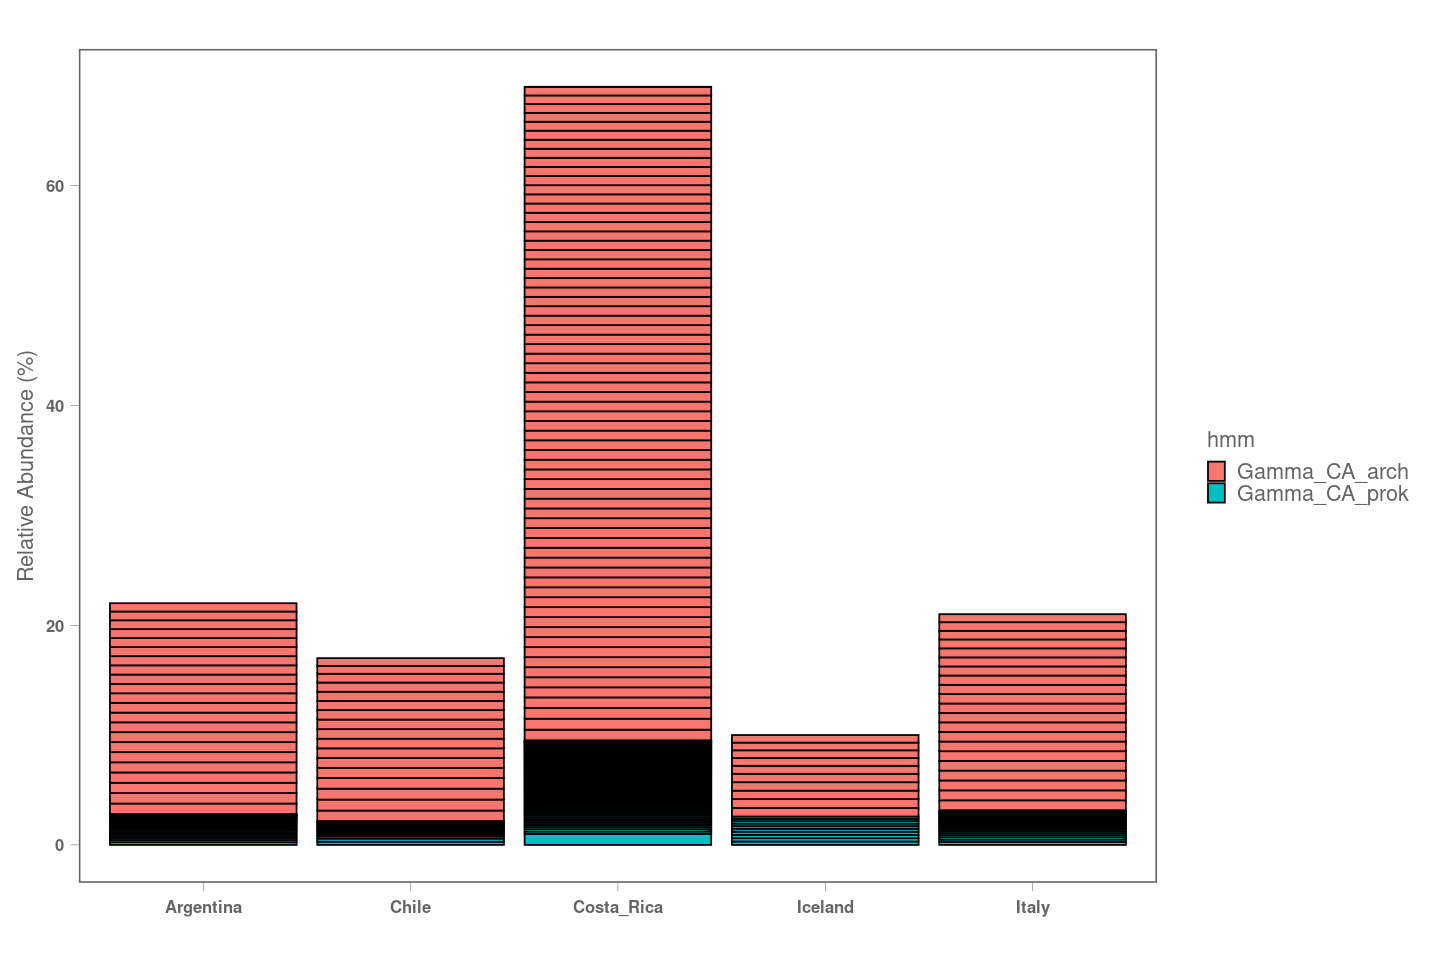

In [16]:
phyl_bio <- plot_bar(subset_samples(CAs_hmm), fill="hmm", x="nation", title = "") +  

#gghighlight(phyl_bio$data$Abundance > 0.009, use_group_by = FALSE) +

labs(x="",
     y="Relative Abundance (%)") +

theme_glab() + theme(legend.position = "right")+
theme(axis.text.x = element_text(angle = 0, vjust = 0.25, hjust=0.5),
      axis.text=element_text(size=10,face="bold")) 

phyl_bio

## Beta-Diversity analysis

## NMDS Jaccard similarity index: Weighted and Unweighted

## Weighted PCoA Jaccard

In [17]:
CAs_wjak <- phyloseq::distance(CAs, method = "jaccard")
CAs_jw <- ordinate(CAs,CAs_wjak, method = "PCoA")
evals_jw <- CAs_jw$values$Eigenvalues

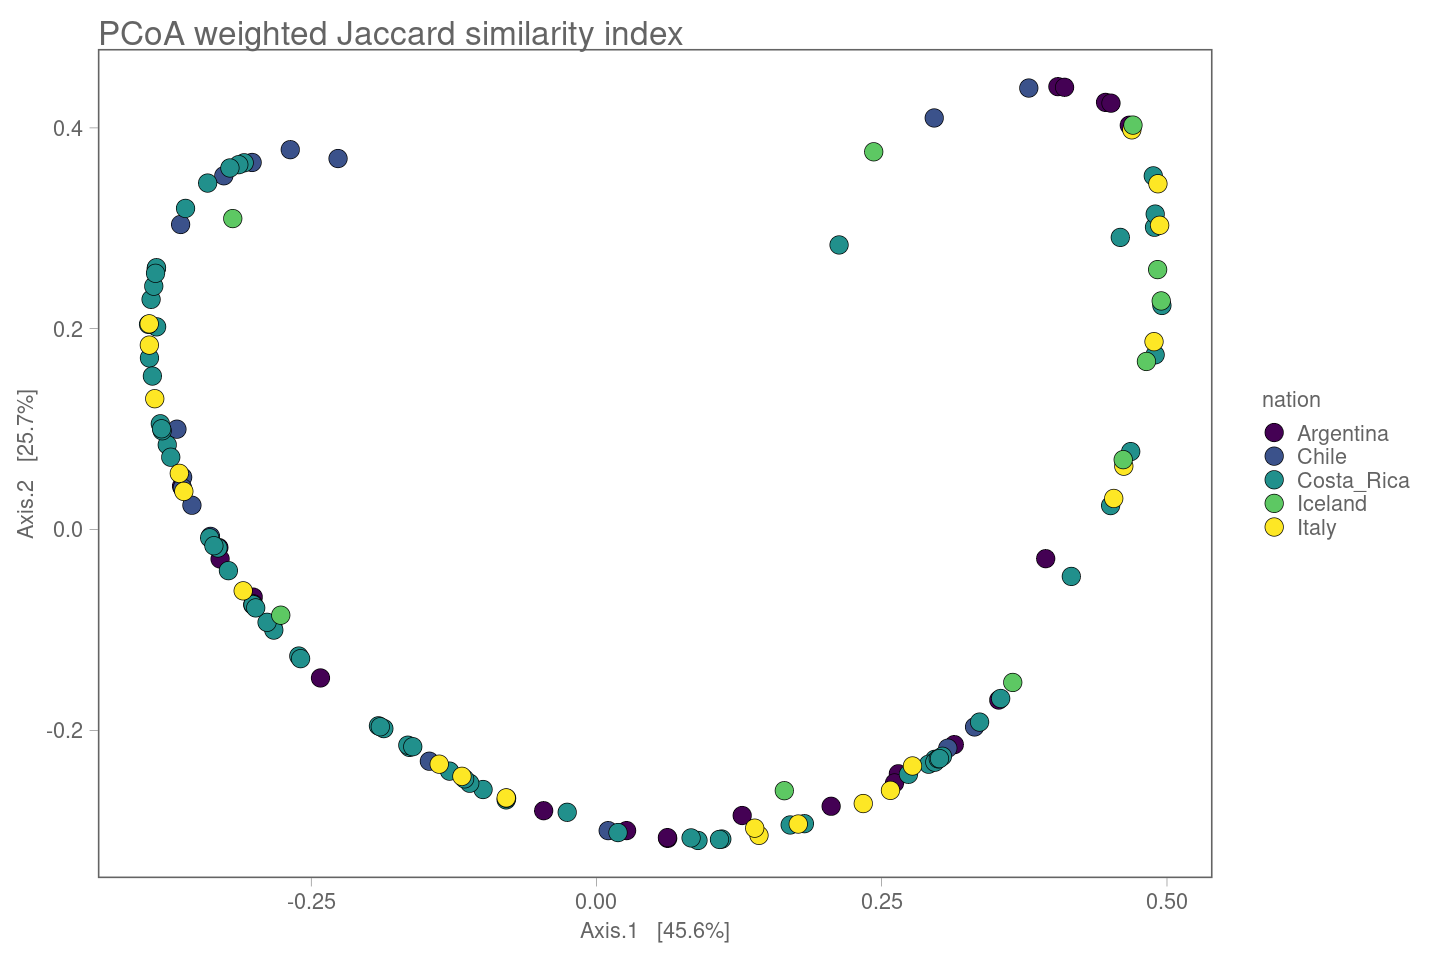

In [18]:
p1 <- plot_ordination(CAs, CAs_jw, type="sample", title="PCoA weighted Jaccard similarity index") +
#coord_fixed(sqrt(evals_jw[2] / evals_jw[1]))  + 
geom_point(aes(fill=nation), size=5, shape=21, stroke=0.3) + 
#geom_text(aes(label= sample), size=4, hjust=0.2,vjust=2) + 
scale_fill_viridis(discrete=T) +
scale_shape_manual(values=c(21:23)) +
theme_glab() + theme(legend.position = "right")+ 
guides(fill = guide_legend(override.aes = list(shape = 21))) 
p1

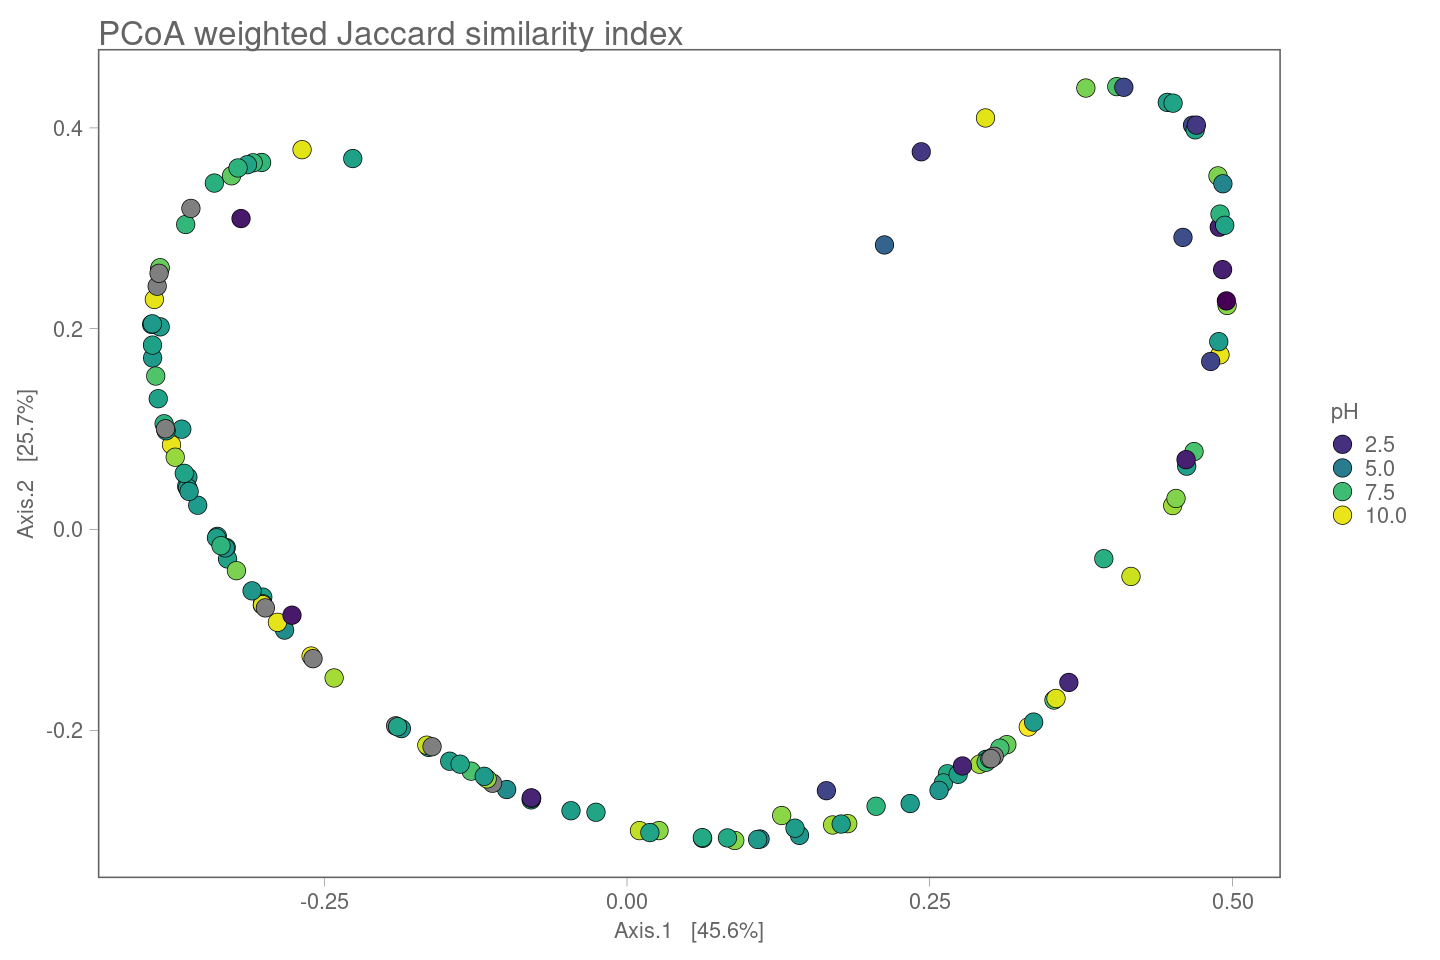

In [19]:
p1 <- plot_ordination(CAs, CAs_jw, type="sample", title="PCoA weighted Jaccard similarity index") +
#coord_fixed(sqrt(evals_jw[2] / evals_jw[1]))  + 
geom_point(aes(fill=pH), size=5, shape=21, stroke=0.3) + 
#geom_text(aes(label= sample), size=4, hjust=0.2,vjust=2) + 
scale_fill_viridis(discrete=F) +
scale_shape_manual(values=c(21:23)) +
theme_glab() + theme(legend.position = "right")+ 
guides(fill = guide_legend(override.aes = list(shape = 21))) 
p1

## nMDS weighted Jaccard

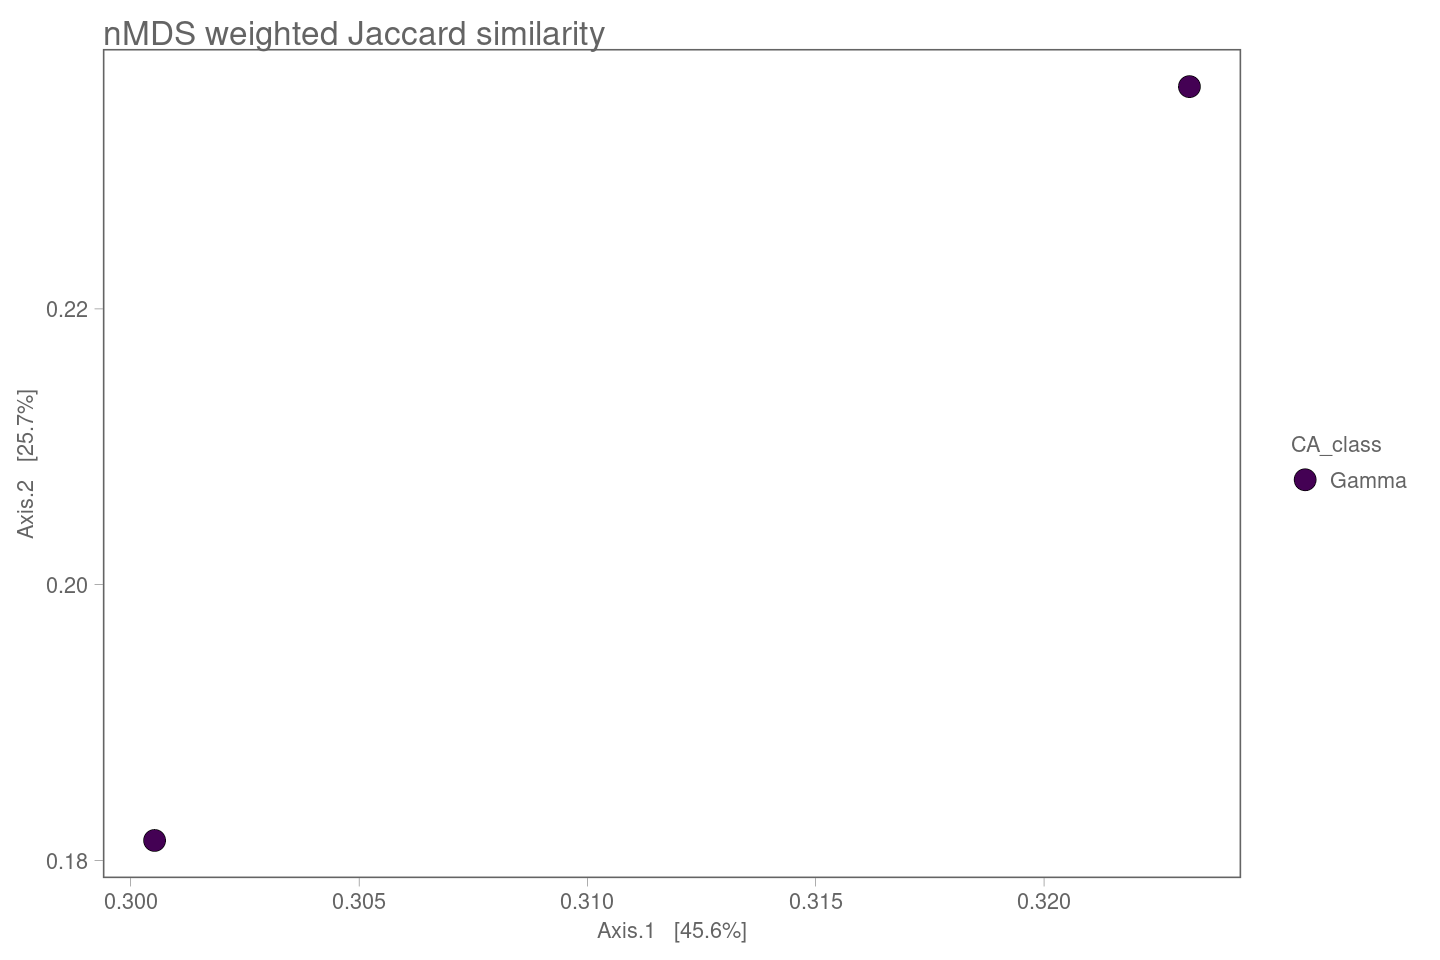

In [20]:
plot_ordination(CAs, CAs_jw, type="taxa",title="nMDS weighted Jaccard similarity") +

    geom_point(aes(fill=CA_class),shape=21, size=6,color="black",stroke=0.3) + 

    #geom_text(aes(label= nation), size=4, hjust=0.2,vjust=2) +

    scale_fill_viridis(discrete=T) + 

    scale_shape_manual(values=c(21:24)) +

    theme_glab() + theme(legend.position = "right") +

    guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black")))

## nMDS unweighted jaccard

In [21]:
CAs_wjac <- phyloseq::distance(CAs, method = "jaccard")
CAs_unjac <- phyloseq::distance(CAs, method = "jaccard", binary = TRUE)

In [22]:
CAs_juw <- ordinate(CAs, CAs_unjac, method = "NMDS",trymax=100)

Run 0 stress 1.77309e-16 
Run 1 stress 0 
... New best solution
... Procrustes: rmse 0.06925673  max resid 0.3151453 
Run 2 stress 0 
... Procrustes: rmse 0.0788361  max resid 0.2514424 
Run 3 stress 0 
... Procrustes: rmse 0.07827564  max resid 0.2148437 
Run 4 stress 7.523957e-05 
... Procrustes: rmse 0.07935488  max resid 0.2331804 
Run 5 stress 0.01972014 
Run 6 stress 0 
... Procrustes: rmse 0.07887231  max resid 0.2412156 
Run 7 stress 0.02424261 
Run 8 stress 9.357344e-05 
... Procrustes: rmse 0.07900301  max resid 0.2281196 
Run 9 stress 0 
... Procrustes: rmse 0.07646611  max resid 0.1852678 
Run 10 stress 0 
... Procrustes: rmse 0.07907535  max resid 0.2380144 
Run 11 stress 0 
... Procrustes: rmse 0.07648427  max resid 0.2234027 
Run 12 stress 0 
... Procrustes: rmse 0.07865418  max resid 0.2384025 
Run 13 stress 0.02690097 
Run 14 stress 0 
... Procrustes: rmse 0.07669601  max resid 0.1928532 
Run 15 stress 0 
... Procrustes: rmse 0.07980125  max resid 0.2650027 
Run 16 str

Warning message in metaMDS(ps.dist):
“stress is (nearly) zero: you may have insufficient data”


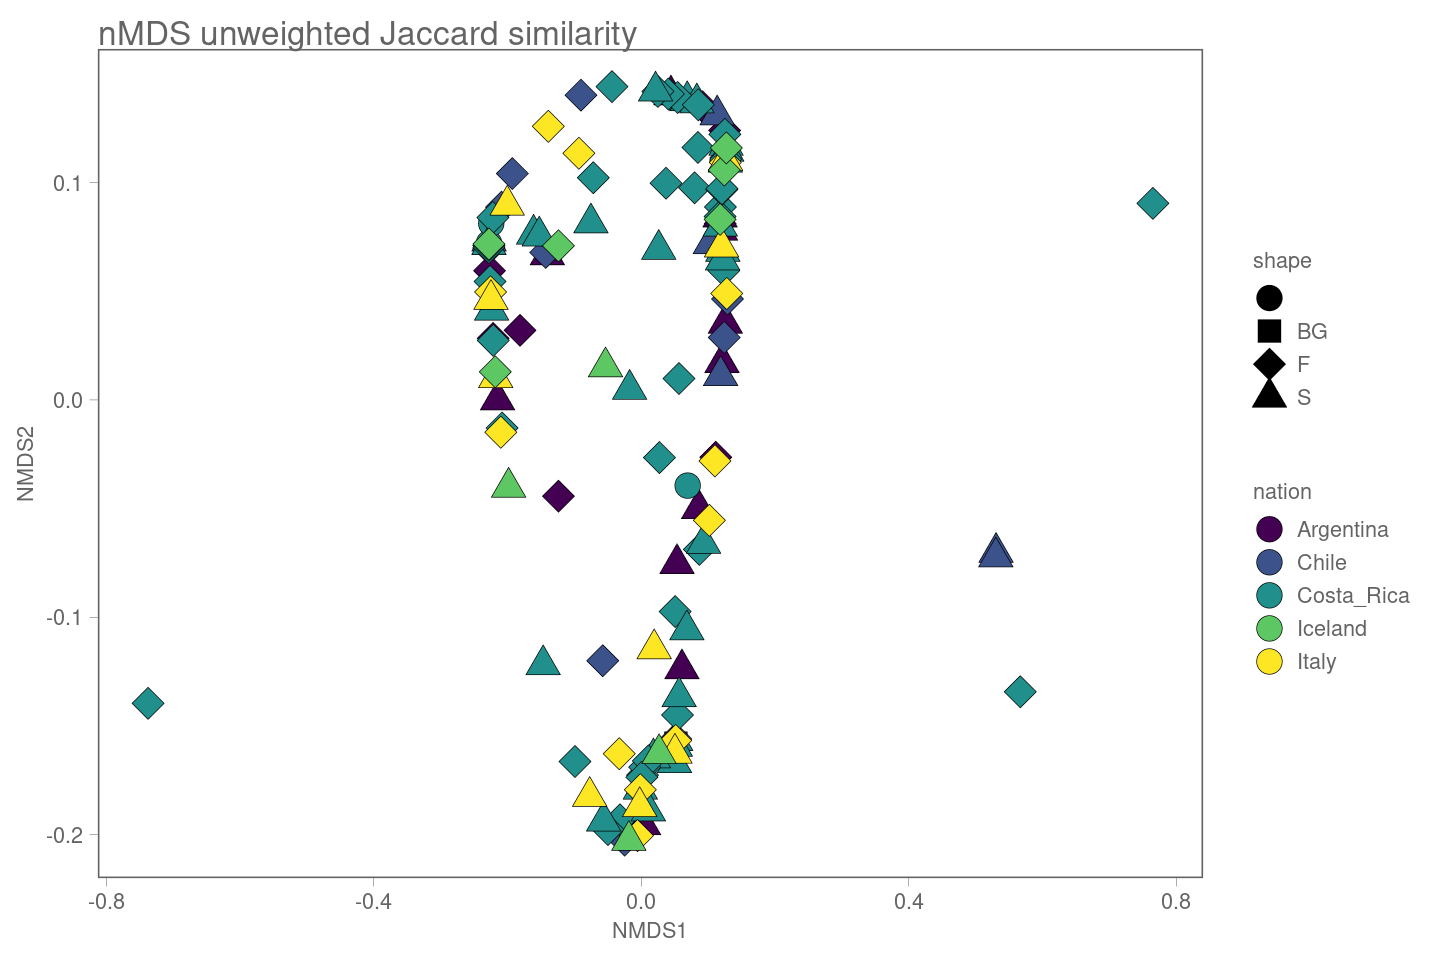

In [23]:
plot_ordination(CAs, CAs_juw, type="samples",title="nMDS unweighted Jaccard similarity") +

        geom_point(aes(fill=nation,shape=type),size=7,color="black",stroke=0.3) + 

        #geom_text(aes(label= nation), size=4, hjust=0.4,vjust=2) + 

        scale_fill_viridis(discrete=TRUE) + scale_shape_manual(values=c(21:24)) +

        theme_glab() + theme(legend.position = "right") +

        guides(fill = guide_legend(override.aes = list(shape = 21) ),
              shape = guide_legend(override.aes = list(fill = "black")))

In [24]:
CAs_jw <- ordinate(CAs,CAs_wjac, method = "NMDS",trymax=100)

Run 0 stress 0.03261794 
Run 1 stress 0.02887456 
... New best solution
... Procrustes: rmse 0.0352248  max resid 0.177691 
Run 2 stress 0.02971364 
Run 3 stress 0.02894948 
... Procrustes: rmse 0.003427759  max resid 0.02791739 
Run 4 stress 0.02896753 
... Procrustes: rmse 0.009080607  max resid 0.06857268 
Run 5 stress 0.02853267 
... New best solution
... Procrustes: rmse 0.003389322  max resid 0.02224755 
Run 6 stress 0.02996835 
Run 7 stress 0.02907563 
Run 8 stress 0.02850212 
... New best solution
... Procrustes: rmse 0.002084463  max resid 0.0100913 
Run 9 stress 0.03039408 
Run 10 stress 0.02923644 
Run 11 stress 0.02955765 
Run 12 stress 0.02899892 
... Procrustes: rmse 0.008688091  max resid 0.06928627 
Run 13 stress 0.02942551 
Run 14 stress 0.02953488 
Run 15 stress 0.02992714 
Run 16 stress 0.02964043 
Run 17 stress 0.02885898 
... Procrustes: rmse 0.004532532  max resid 0.0270606 
Run 18 stress 0.02908791 
Run 19 stress 0.02961257 
Run 20 stress 0.02910866 
*** Best sol

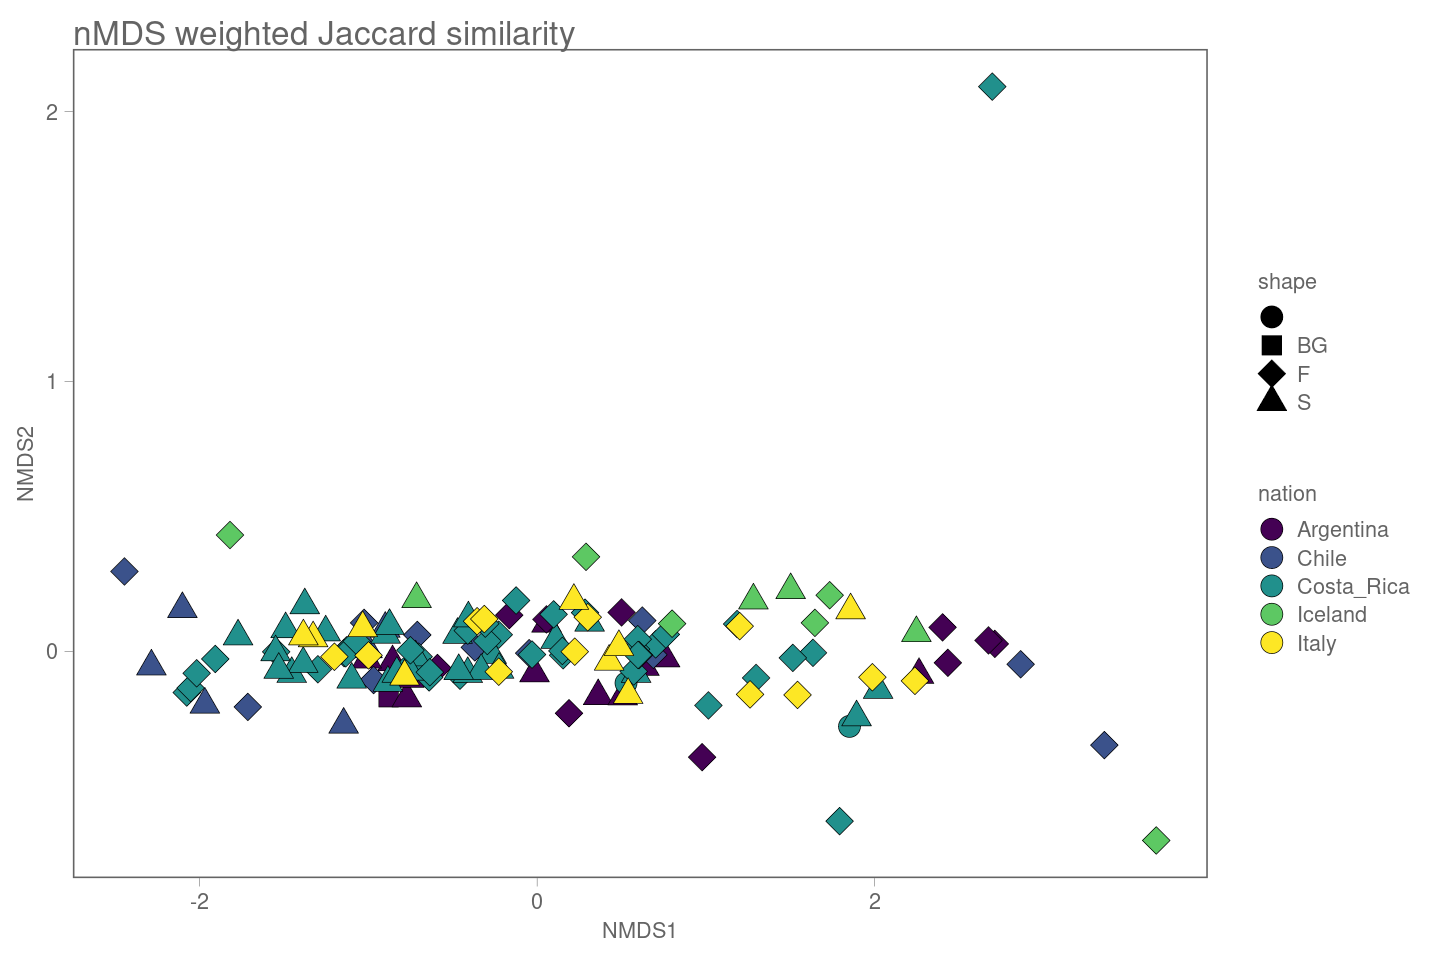

In [25]:
plot_ordination(CAs, CAs_jw, type="samples",title="nMDS weighted Jaccard similarity") +

    geom_point(aes(fill=nation, shape=type),size=6,color="black",stroke=0.3) + 

    #geom_text(aes(label= nation), size=4, hjust=0.2,vjust=2) +

    scale_fill_viridis(discrete=T) + 

    scale_shape_manual(values=c(21:24)) +

    theme_glab() + theme(legend.position = "right") +

    guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black")))

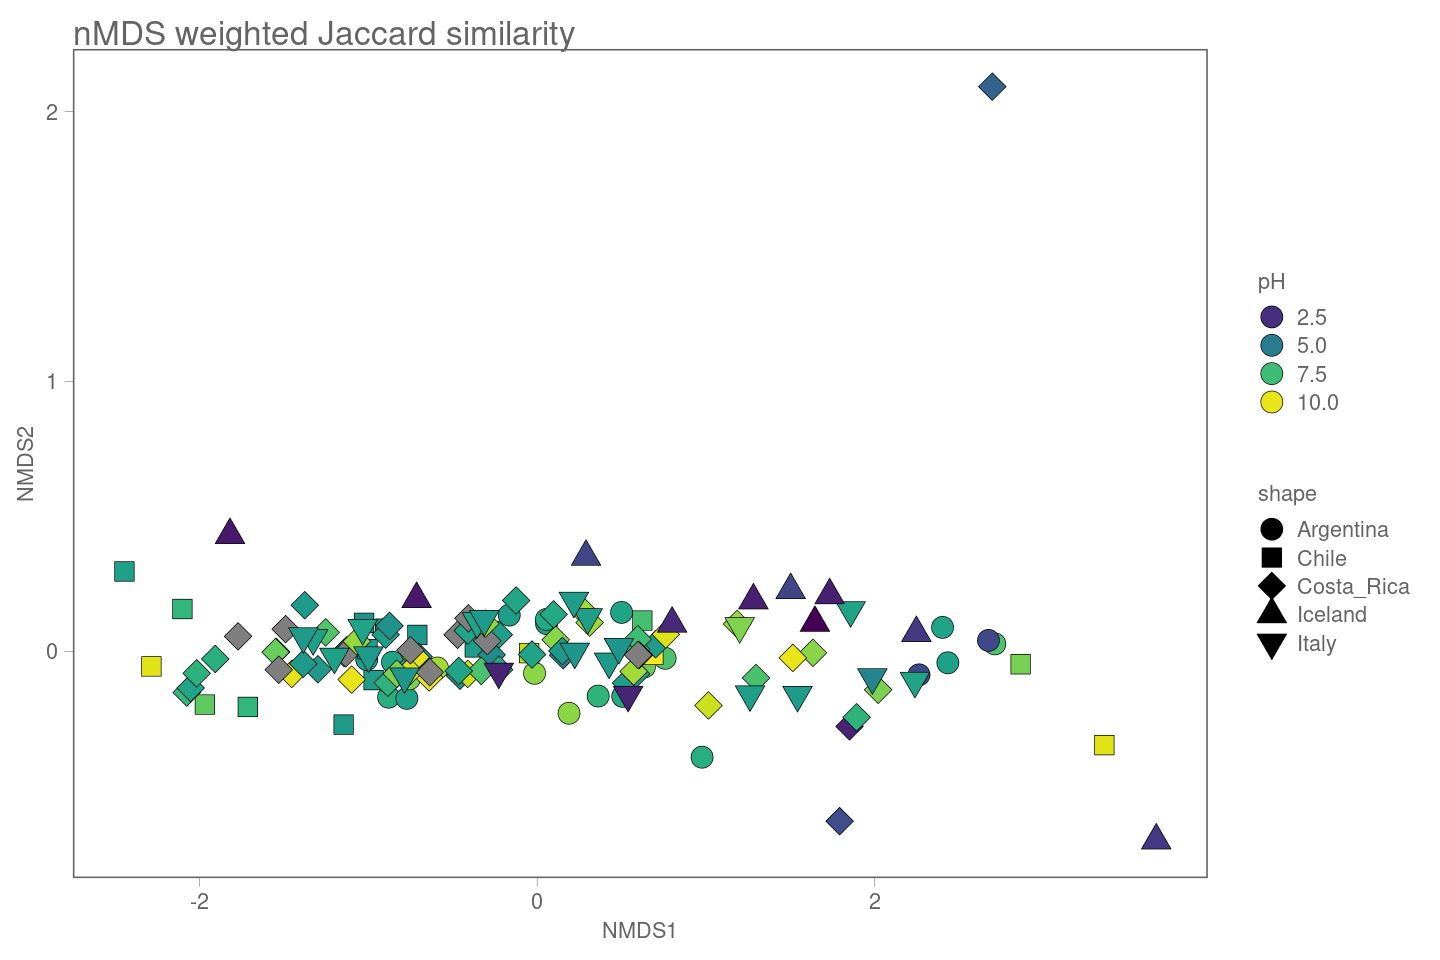

In [26]:
plot_ordination(CAs, CAs_jw, type="samples",title="nMDS weighted Jaccard similarity") +

    geom_point(aes(fill=pH,shape=nation),size=6,color="black",stroke=0.3) + 

    #geom_text(aes(label= nation), size=4, hjust=0.2,vjust=2) +

    scale_fill_viridis(discrete=F) + 

    scale_shape_manual(values=c(21:25)) +

    theme_glab() + theme(legend.position = "right") +

    guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black")))

## Vector Fitting Weighted Jaccard

In [27]:
nmds_df1_jw<-cbind(sample_data(CAs),CAs_jw$points)
nmds_df1_jw

,ID,expedition,nation,site_name,latitude,longitude,type,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc,MDS1,MDS2
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG11,AG11,ARG19,Argentina,Pastos Grandes,-24.36459,-66.57113,S,44.90,8.74,-15.33,50.0,0.61,15.400,1288,-0.01534362,-0.081099603
AG13,AG13,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.85819,-66.99269,S,80.00,7.75,-14.81,10.0,0.19,NA,429,0.75865859,-0.025615981
AG15,AG15,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.85824,-66.99282,S,80.00,3.21,-12.40,60.0,1.02,21.120,2050,2.26369797,-0.086867980
AG17,AG17,ARG19,Argentina,Galán La Colcha,-26.03291,-66.98609,BG,84.00,6.94,-2.62,20.0,6.10,300.080,10618,-0.88010406,-0.169619642
AG19,AG19,ARG19,Argentina,Botijuela,-25.74303,-67.82325,S,40.00,6.44,NA,10.0,8.65,700.480,14643,-0.77188489,-0.173991303
AG1,AG1,ARG19,Argentina,Incachule,-24.28213,-66.46676,S,46.90,6.52,NA,10.0,1.54,NA,3000,-0.85694676,-0.039900710
AG22,AG22,ARG19,Argentina,Rosario de la Frontera,-25.40986,-64.59134,S,82.00,8.23,-8.28,0.0,1.57,151.800,3056,0.63601710,-0.057281443
AG24,AG24,ARG19,Argentina,El Galpón,-24.40986,-64.59146,S,54.30,8.47,-10.67,0.0,1.81,94.662,3474,-0.75742940,-0.101817134
AG3,AG3,ARG19,Argentina,Pompeya,-24.24669,-66.36272,S,50.30,6.53,-5.33,10.0,5.09,930.309,9000,0.05581359,0.102997276


In [28]:
nmds_df1.1_jw <- nmds_df1_jw[,5:16]

nmds_df1.1_jw <- nmds_df1.1_jw[ -c(3) ]

nmds_df1.1_jw


,latitude,longitude,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc,MDS1,MDS2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG11,-24.36459,-66.57113,44.90,8.74,-15.33,50.0,0.61,15.400,1288,-0.01534362,-0.081099603
AG13,-25.85819,-66.99269,80.00,7.75,-14.81,10.0,0.19,NA,429,0.75865859,-0.025615981
AG15,-25.85824,-66.99282,80.00,3.21,-12.40,60.0,1.02,21.120,2050,2.26369797,-0.086867980
AG17,-26.03291,-66.98609,84.00,6.94,-2.62,20.0,6.10,300.080,10618,-0.88010406,-0.169619642
AG19,-25.74303,-67.82325,40.00,6.44,NA,10.0,8.65,700.480,14643,-0.77188489,-0.173991303
AG1,-24.28213,-66.46676,46.90,6.52,NA,10.0,1.54,NA,3000,-0.85694676,-0.039900710
AG22,-25.40986,-64.59134,82.00,8.23,-8.28,0.0,1.57,151.800,3056,0.63601710,-0.057281443
AG24,-24.40986,-64.59146,54.30,8.47,-10.67,0.0,1.81,94.662,3474,-0.75742940,-0.101817134
AG3,-24.24669,-66.36272,50.30,6.53,-5.33,10.0,5.09,930.309,9000,0.05581359,0.102997276


In [29]:
message("Test with Pearson correlation vs NMDS1:")
# Pearson
for (i in 1:length(nmds_df1.1_jw)) {
    a <- cor.test(nmds_df1.1_jw[,i], nmds_df1.1_jw$MDS1)
       if (a$p.value<0.05) {
           print(paste(i,colnames(nmds_df1.1_jw)[i],a$estimate, a$parameter, a$p.value))
       }
}

message("Test with Pearson correlation vs NMDS2:")
# Pearson
for (i in 1:length(nmds_df1.1_jw)) {
    a <- cor.test(nmds_df1.1_jw[,i], nmds_df1.1_jw$MDS2)
       if (a$p.value<0.01) {
           print(paste(i,colnames(nmds_df1.1_jw)[i],a$estimate, a$parameter, a$p.value))
       }
}

Test with Pearson correlation vs NMDS1:



[1] "2 longitude 0.24458790999831 137 0.00371004961015198"
[1] "3 temperature 0.399603015489071 127 2.71326662800378e-06"
[1] "4 pH -0.200422728171868 126 0.0233080178916769"
[1] "7 salinity -0.244324508170192 117 0.00740977503878994"
[1] "9 spc -0.209637839345396 122 0.0194488009671917"
[1] "10 MDS1 1 137 0"


Test with Pearson correlation vs NMDS2:



[1] "2 longitude 0.343562920450259 137 3.46202579777231e-05"
[1] "6 dissolved_oxygen 0.268217425541049 101 0.0061575532032995"
[1] "11 MDS2 1 137 0"


In [30]:
env_jw <-envfit(nmds_df1.1_jw[,c(10:11)], nmds_df1.1_jw[,c(1:9)], perm = 9999, na.rm = T)
env_jw


***VECTORS

                      MDS1      MDS2     r2 Pr(>r)    
latitude         -0.082219  0.996610 0.1398 0.2433    
longitude        -0.081940  0.996640 0.1345 0.2569    
temperature       0.208672 -0.977990 0.5296 0.0006 ***
pH               -0.253465 -0.967340 0.2824 0.0542 .  
C13              -0.184354  0.982860 0.1579 0.2096    
dissolved_oxygen -0.078314  0.996930 0.0012 0.9892    
salinity         -0.187914  0.982190 0.2806 0.0491 *  
alkalinity       -0.075176  0.997170 0.2455 0.0752 .  
spc              -0.252006  0.967730 0.2047 0.1115    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 9999

118 observations deleted due to missingness

In [31]:
env.scores_jw <- as.data.frame(scores(env_jw, display = "vectors"))         #extracts relevant scores from envifit
env.scores_jw <- cbind(env.scores_jw, env.variables = rownames(env.scores_jw)) #and then gives them their names

env.scores_jw <- cbind(env.scores_jw, pval = env_jw$vectors$pvals) # add pvalues to dataframe
sig.env.scrs_jw <- subset(env.scores_jw, pval<=0.09) #subset data to show variables significant at 0.05

sig.env.scrs_jw

,MDS1,MDS2,env.variables,pval
,<dbl>,<dbl>,<chr>,<dbl>
temperature,0.15186052,-0.7117260,temperature,0.0006
pH,-0.13469981,-0.5140794,pH,0.0542
salinity,-0.09954894,0.5203197,salinity,0.0491
alkalinity,-0.03725009,0.4940999,alkalinity,0.0752


In [32]:
en_coord_cont.1_jw = sig.env.scrs_jw[,1:2] * ordiArrowMul(env_jw)
en_coord_cont.1_jw

,MDS1,MDS2
,<dbl>,<dbl>
temperature,0.21889502,-1.0258972
pH,-0.19415919,-0.7410051
salinity,-0.14349198,0.7500000
alkalinity,-0.05369308,0.7122063


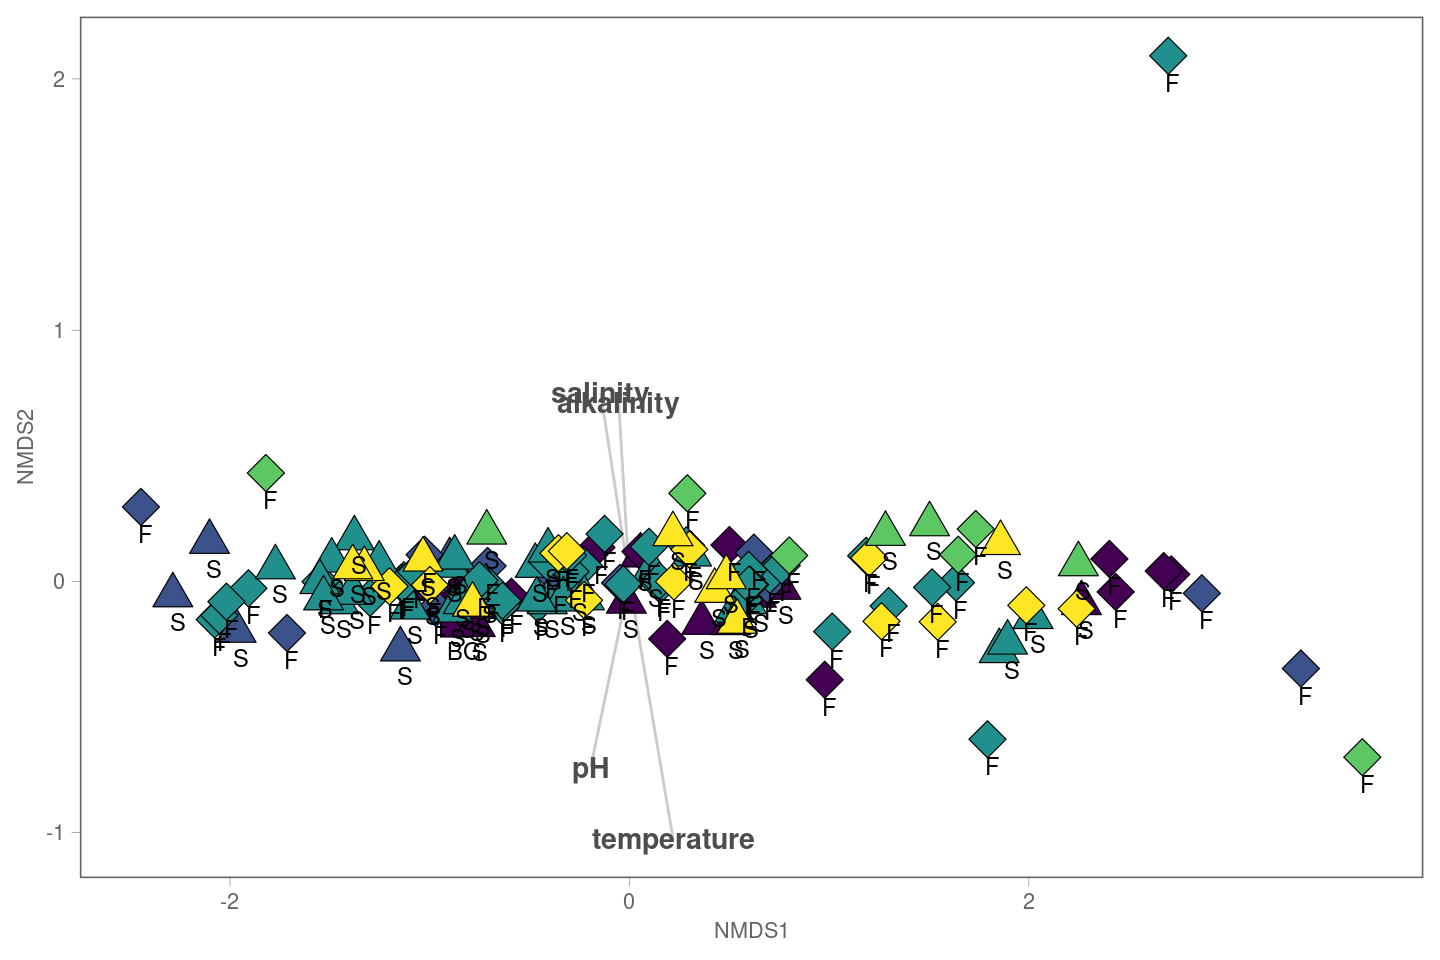

In [33]:
nmds_jw_envfit <- ggplot(data = nmds_df1_jw, aes(x = MDS1, y = MDS2)) + 
     
        geom_segment(data = en_coord_cont.1_jw, aes(x = 0, y = 0, xend = MDS1, yend = MDS2), 
                            size =.8, alpha = 0.8, colour = "grey") + 
     
        geom_text(data = en_coord_cont.1_jw, aes(x = MDS1, y = MDS2), colour = "grey30", 
                         fontface = "bold", size=6, label = row.names(en_coord_cont.1_jw)) + 
     
        geom_point(aes(fill = nation ,shape = type), size = 8) +
    
        scale_fill_viridis(discrete=TRUE) +
     
        scale_shape_manual(values = c(24,22,23,24,25)) + 
     
        geom_text(aes(label = type), size=5, hjust=0.2, vjust=2) +
     
        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) + 
       
        xlab("NMDS1") + ylab("NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
        
        theme_glab() + 

        theme(legend.position = "none")

nmds_jw_envfit